# Conway's Game of Life

### Rules

The Game of Life (GoF) is a cellular automaton devised by the British mathematician John Horton Conway in 1970. The game is a zero-player game, meaning that its evolution is determined by its initial state, requiring no further input. One interacts with the Game of Life by creating an initial configuration and observing how it evolves, or, for advanced players, by creating patterns with particular properties.

The universe of the Game of Life is an infinite two-dimensional orthogonal grid of square cells, each of which is in one of two possible states, live or dead. Every cell interacts with its eight neighbours, which are the cells that are directly horizontally, vertically, or diagonally adjacent. At each step in time, the following transitions occur:

 - Any live cell with fewer than two live neighbours dies, as if by underpopulation.
 - Any live cell with more than three live neighbours dies, as if by overcrowding.
 - Any live cell with two or three live neighbours lives, unchanged, to the next generation.
 - Any dead cell with exactly three live neighbours becomes a live cell.
 
 The initial pattern (generation 0) constitutes the "seed" of the system. Time is considered discrete, and each time step (sometimes called a tick), the previous rules are applied simultaneously to every cell in the grid; "births" and "deaths" are immediate. Each generation is a pure function of the previous generation alone.

### Assignments

 - Begin by implementing the GoF's rules and create few examples with basic seeds in small dimensions. Hint: create .gif animations from sequences of still .png images
 - Implement examples of the three categories of patterns still lifes, oscillators and spaceships (check the wiki link)
 - Analyse the evolutions of these patterns in terms of frequency (the number of cycles required to return to the original configuration, if any), occupancy (how many alive cells there are at every step of the game), replication or heat (the average number of cells that change state at each generation), speed (if applicable), etc.
 - Increase the size of the GoF's world and play with more advanced and complex patterns

# Grid

In [4]:
import pygame
import numpy as np
import random
import numpy as np

class Grid:
    def __init__(self, width, height, scale, offset):
        self.scale = scale
        self.columns = int(height/scale)
        self.rows = int(width/scale)
        self.size = (self.rows, self.columns)
        
        self.grid_array = np.ndarray(shape=(self.size))#initialized grid 
        self.freq_array = np.ndarray(shape=(self.size))#grid for frequency calculation
        
        self.count = 0 
        self.frequency = [] #list of istants of init initialization 
        self.init_alive = 0 #number of alive cells at t = 0
        
        self.offset = offset
        self.heat_matrix = np.zeros(self.size)
        self.function_alive = []    #list to be plotted as function
        

    #inizialize all squares with 0
    def initialize_array(self):
        for x in range(self.rows):
            for y in range(self.columns):
                self.grid_array[x][y] = 0
        self.freq_array = self.count_alive()
    
    #define a 2d array where every cell has randomly 0 or 1
    def random2d_array(self):
        for x in range(self.rows):
            for y in range(self.columns):
                self.grid_array[x][y] = random.randint(0,1)
        self.freq_array = self.grid_array
                
    #define a square in the 2d array
    def square_2d_array(self):
        for x in range(1,3):
            for y in range(1,3):
                self.grid_array[x][y] = 1
        self.freq_array = self.grid_array
                
    #define a 2 period form in the 2d array
    def period2_2d_array(self):
        for y in range(1,3):
            for x in range(1,4):
                self.grid_array[x+y][y] = 1
        self.freq_array = self.grid_array
        self.init_alive = self.count_alive()
        
    def period15_2d_array(self):
        for x in range(6,9):
            for y in range(6,14):
                self.grid_array[x][y] = 1
        self.grid_array[7][7] = 0
        self.grid_array[7][12] = 0
        self.freq_array = self.grid_array
        self.init_alive = self.count_alive()
        
        
    
    #define a spaceship form in the 2d array
    def spaceship_2d_array(self):
        for y in range(1,4):
            self.grid_array[3][y] = 1
        self.grid_array[1][2] = 1
        self.grid_array[2][3] = 1
        self.freq_array = self.grid_array
        self.init_alive = self.count_alive()
    
    #define a glinder_gun 
    def glinder_gun(self):
        self.grid_array[1][5] = 1
        self.grid_array[1][6] = 1
        self.grid_array[2][5] = 1
        self.grid_array[2][6] = 1
        
        self.grid_array[11][5] = 1
        self.grid_array[11][6] = 1
        self.grid_array[11][7] = 1
        self.grid_array[12][4] = 1
        self.grid_array[12][8] = 1
        self.grid_array[13][3] = 1
        self.grid_array[13][9] = 1
        self.grid_array[14][3] = 1
        self.grid_array[14][9] = 1
        self.grid_array[15][6] = 1
        self.grid_array[16][4] = 1
        self.grid_array[16][8] = 1
        self.grid_array[17][5] = 1
        self.grid_array[17][6] = 1
        self.grid_array[17][7] = 1
        self.grid_array[18][6] = 1
        
        self.grid_array[21][3] = 1
        self.grid_array[21][4] = 1
        self.grid_array[21][5] = 1
        self.grid_array[22][3] = 1
        self.grid_array[22][4] = 1
        self.grid_array[22][5] = 1
        self.grid_array[23][2] = 1
        self.grid_array[23][6] = 1
        self.grid_array[25][1] = 1
        self.grid_array[25][2] = 1
        self.grid_array[25][6] = 1
        self.grid_array[25][7] = 1
        
        self.grid_array[35][3] = 1
        self.grid_array[35][4] = 1
        self.grid_array[36][3] = 1
        self.grid_array[36][4] = 1
        
        self.freq_array = self.grid_array
        self.init_alive = self.count_alive()

    #conway's rules of game of life:
    def Conway(self, off_color, on_color, surface, pause):
        for x in range(self.rows):
            for y in range(self.columns):
                # 1 --> draw a colored rect
                # 0 --> draw a (white) rect
                y_pos = y * self.scale
                x_pos = x * self.scale
                if self.grid_array[x][y] == 1:
                    pygame.draw.rect(surface, on_color, [x_pos, y_pos, self.scale-self.offset, self.scale-self.offset])
                else:
                    pygame.draw.rect(surface, off_color, [x_pos, y_pos, self.scale-self.offset, self.scale-self.offset])
        
        #what happends for every step?
        next = np.ndarray(shape=(self.size))
        if pause == False:
            self.count = self.count+1 #step counter
            for x in range(self.rows):
                for y in range(self.columns):
                    # 0 --> 1 if it has exactly 3 neighbors alive (reproduction)
                    # 1 --> 0 if it has < 2 or > 3 neighbors alive (under/over populated)
                    state = self.grid_array[x][y]
                    neighbours = self.get_neighbours(x, y) #the value returned by this function is the number of neighbours alive
                    alive_cells = self.count_alive()
                    if state == 1:
                        self.heat_matrix[x][y] += 1
                    if state == 0 and neighbours == 3:
                        next[x][y] = 1
                    elif state == 1 and (neighbours < 2 or neighbours > 3):
                        next[x][y] = 0
                    else:
                        next[x][y] = state
                        
            self.function_alive.append(alive_cells) #cells alive in specific step
            
            #frequency calculation
            if (self.init_alive == alive_cells):
                if np.array_equal(self.freq_array, self.grid_array): 
                    self.frequency.append(self.count)
            
            self.grid_array = next
            
                
            
    
    def print_status(self):
        #plot heat map
        plt.figure(figsize = (15,8))
        transpose_matrix = np.transpose(self.heat_matrix) #transpose matrix for seaborn
        sns.heatmap(transpose_matrix, annot=True, fmt='g', cmap="Reds" )
        plt.title('Grid heat map', fontsize=20, fontweight = "bold")
        plt.show()
            
        #plot trend of alive cells
        plt.figure(figsize = (10,7))
        x_axis = list(np.arange(1,len(self.function_alive)+1))
    
        plt.plot(x_axis, self.function_alive)
        plt.xlabel('Time', fontsize = 16)
        plt.ylabel('Alive cells', fontsize = 16)
        plt.title('Trend of the alive cells', fontsize = 20, fontweight = "bold")
        if len(self.frequency) > 1:
            for xc in self.frequency:
                plt.axvline(x=xc, color='r', linestyle='--')
            print('Frequency: ',self.frequency[1]-self.frequency[0])
        plt.show()
    
    def return_heat_matrix(self):
        return(self.heat_matrix)
    
    def return_function_alive(self):
        return(self.function_alive)
    
    def HandleMouse(self, x, y):
        _x = x//self.scale
        _y = y//self.scale
        if self.grid_array[_x][_y] != None:
            if self.grid_array[_x][_y] == 1:  self.grid_array[_x][_y] = 0
            else:  self.grid_array[_x][_y] = 1
   
    def reset(self):
        self.heat_matrix = np.zeros(self.size)
        self.function_alive = []
        self.count = 0
        self.frequency = []
        
        
    #Function that returns the count of how many heighbours each cell has    
    def get_neighbours(self, x, y):
        total = 0
        for n in range(-1, 2):
            for m in range(-1, 2):
                x_edge = (x+n+self.rows) % self.rows
                y_edge = (y+m+self.columns) % self.columns
                total += self.grid_array[x_edge][y_edge]
        total -= self.grid_array[x][y]
        return total
    
    #function that returns how many cells are alive during every step
    def count_alive(self):
        count = 0
        for x in range(self.rows):
            for y in range(self.columns):
                count += self.grid_array[x][y]
        return count

# Main

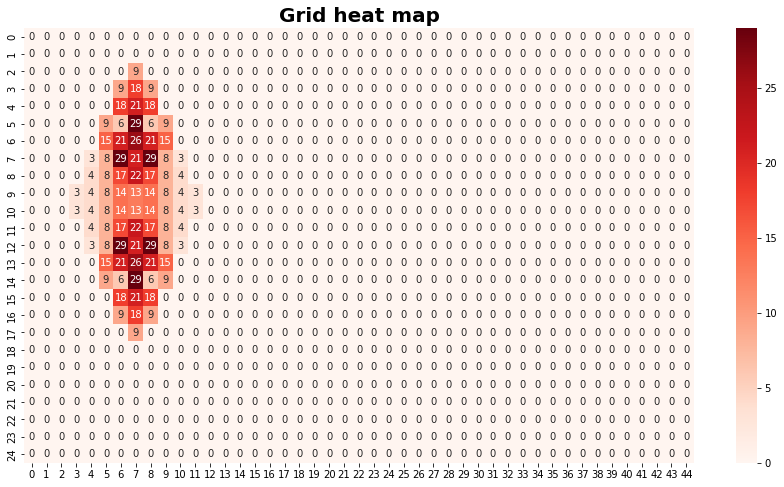

Frequency:  15


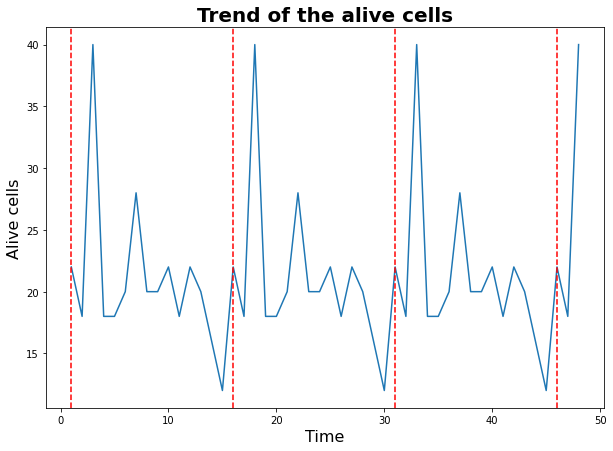

In [ ]:
import pygame
import time
import random
import numpy as np
import os
import grid
import seaborn as sns
import matplotlib.pyplot as plt

os.environ["SDL_VIDEO_CENTERED"]='1'

# setting some constants and variables like resolution, fps, colors...
WIDTH, HEIGHT = 900,500
SIZE = (WIDTH, HEIGHT)
FPS = 10
#pygame colors are set in RGB: this is the colorset to use
black = (0, 0, 0)
blue = (0, 121, 150)
white = (255, 255, 255)
SCALE = 20
OFFSET = 1

#initialize screen play
pygame.init()
pygame.display.set_caption("Conway's Game Of Life")
screen = pygame.display.set_mode(SIZE)
clock = pygame.time.Clock()

#initialize grid
Grid = Grid(WIDTH, HEIGHT, SCALE, OFFSET)

Grid.initialize_array()


pause = True
run = True
while run:
    clock.tick(FPS)
    screen.fill(black)
    # Keyboard inputs:  
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            run = False
        if event.type == pygame.KEYUP:
            if event.key == pygame.K_ESCAPE:
                run = False
            if event.key == pygame.K_SPACE:
                pause = not pause
                
            if event.key == pygame.K_p:
                Grid.print_status()
                
            if event.key == pygame.K_t:
                Grid.initialize_array()
                Grid.period15_2d_array()
            
            if event.key == pygame.K_r:
                pygame.display.set_caption("Initialized")
                Grid.initialize_array()
                Grid.reset()
                
            if event.key == pygame.K_0: 
                pygame.display.set_caption("Initialized")
                Grid.initialize_array()
            
            if event.key == pygame.K_1:
                pygame.display.set_caption("Squared")
                Grid.initialize_array()
                Grid.square_2d_array()
            if event.key == pygame.K_2:
                pygame.display.set_caption("Period2")
                Grid.initialize_array()
                Grid.period2_2d_array()
            if event.key == pygame.K_3:
                pygame.display.set_caption("Period15")
                Grid.initialize_array()
                Grid.period15_2d_array()
            if event.key == pygame.K_4:
                pygame.display.set_caption("Spaceship")
                Grid.initialize_array()
                Grid.spaceship_2d_array()
            if event.key == pygame.K_5:
                pygame.display.set_caption("Glinder gun")
                Grid.initialize_array()
                Grid.glinder_gun()    
            if event.key == pygame.K_6:
                pygame.display.set_caption("Random inizialization")
                Grid.initialize_array()
                Grid.random2d_array()
           

    
    #setting of Conway's parameters
    Grid.Conway(off_color = white, on_color = blue, surface = screen, pause = pause)

    if pygame.mouse.get_pressed()[0]:
        mouseX, mouseY = pygame.mouse.get_pos()
        Grid.HandleMouse(mouseX, mouseY)

    #function that updates the screen = creates the animation
    pygame.display.update()

pygame.quit()